### COVID-19

ဗိုင်းရပ်၏အမည်မှာ **Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2)** ဖြစ်ပြီးထိုဗိုင်းရပ်ကြောင့်ဖြစ်သောရောဂါကို **coronavirus disease(COVID-19)** ဟုခေါ်ပါသည်။ Corona ဟူသောစကားလုံးသည် Latin ဘာသာဖြင့်ရေးသားထားခြင်းဖြစ်ပြီး English လို Crown ဟုအဓိပ္ပါယ်ရပါသည်။ ဗိုင်းရပ်၏ပုံသဏ္ဍပေါ်အခြေခံ၍ရေးသားခြင်းဖြစ်ပါသည်။ ဗိုင်းရပ်၏အမည်ပေးခြင်းကို **International Committee on Taxonomy of Viruses (ICTV)** မှပြုလုပ်ပြီး ရောဂါ၏အမည်ပေးခြင်းကို **WHO** မှပြုလုပ်ခြင်းဖြစ်ပါသည်။ 

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/covid_virus_2.jpg' width='400'/>

**[WHO'S NAMING](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it)**

**[WHO-Coronavirus](https://www.who.int/health-topics/coronavirus#tab=tab_1)**

**[MOHS](https://mohs.gov.mm/Home)**

**[COVID-19 ရောဂါနှင့်ပတ်သက်၍လေ့လာတွေ့ရှိမှု့အသစ်](https://metro.co.uk/2020/04/23/us-says-covid-19-lives-just-2-minutes-sunny-surfaces-21c-70f-12602532/)**

**[COVID-19 ရောဂါကြောင့်ဖြစ်ပေါ်လာသောရောဂါလက္ခဏာအသစ်(COVID toes)](https://www.youtube.com/watch?v=WaBXQ1irNA0)**

အထက်ပါ **website** များမှတဆင့်သတင်းအချက်အလက်များရယူနိင်ပါသည်။

In [1]:
%store -r __importing_Lib

In [2]:
__importing_Lib

matplotlib inline backend and ggplot style are used.
Mplotlib version : 3.0.2
Numpy version	 : 1.15.4
Pandas version	 : 0.24.1
Seaborn version	 : 0.9.0
Folium version	 : 0.10.0
Wordcloud version: 1.5.0
Branca version	 : 0.4.0
Other imported is: datetime      
		 : base64      
		 : Json


In [3]:
import matplotlib as mpl
from matplotlib.legend import Legend
from folium import plugins

In [4]:
# The code was removed by Watson Studio for sharing.

(12801, 11)
(12737, 11)
start_date: 31-12-2019
last_date : 24-04-2020
total_death: 190,229
total_cases: 2,667,439
overall_death_rate: 7.132%


dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-04-24   24      4  2020    105       2             Afghanistan    AF   
1 2020-04-23   23      4  2020     84       4             Afghanistan    AF   
2 2020-04-22   22      4  2020     61       1             Afghanistan    AF   
3 2020-04-21   21      4  2020     35       2             Afghanistan    AF   
4 2020-04-20   20      4  2020     88       3             Afghanistan    AF   

  Country_Code  popData2018 continentExp  
0          AFG   37172386.0         Asia  
1          AFG   37172386.0         Asia  
2          AFG   37172386.0         Asia  
3          AFG   37172386.0         Asia  
4          AFG   37172386.0         Asia

In [5]:
body = client_ebd903fa1f234f68a46ff7178f8c1e7e.get_object(Bucket='mkzproject-donotdelete-pr-piwghsabuxrpkz',
                                                          Key='Metadata_Country.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
region_df = pd.read_csv(body, usecols=[0, 1, 2])
region_df.columns = 'Country_Code', 'Region', 'IncomeGroup'
region_df.dropna(subset=['IncomeGroup'], inplace=True)
region_df.head()

Country_Code                     Region          IncomeGroup
0          ABW  Latin America & Caribbean          High income
1          AFG                 South Asia           Low income
2          AGO         Sub-Saharan Africa  Lower middle income
3          ALB      Europe & Central Asia  Upper middle income
4          AND      Europe & Central Asia          High income

In [6]:
region_dict = {'Anguilla': ['Latin America & Caribbean', 'High income'],
               'Bonaire, Saint Eustatius and Saba': ['Latin America & Caribbean', 'High income'],
               'Falkland_Islands_(Malvinas)': ['Latin America & Caribbean', 'High income'],
               'Guernsey': ['Europe & Central Asia', 'High income'],
               'Holy_See': ['Europe & Central Asia', 'High income'],
               'Jersey': ['Europe & Central Asia', 'High income'],
               'Montserrat': ['Latin America & Caribbean', 'Upper middle income'],
               'Taiwan': ['East Asia & Pacific', 'High income']
               }

In [7]:
merge_df = covid_df.merge(region_df, on='Country_Code', how='left')
for cname, (reg, level) in region_dict.items():
    merge_df.loc[merge_df.countriesAndTerritories==cname, ['Region', 'IncomeGroup']] = reg, level
col_to_keep = ['dateRep', 'cases', 'deaths', 'Country_Name', 'Region', 'IncomeGroup']
merge_df = merge_df.rename(columns={'countriesAndTerritories': 'Country_Name'}).loc[:, col_to_keep]
merge_df.info()
merge_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12737 entries, 0 to 12736
Data columns (total 6 columns):
dateRep         12737 non-null datetime64[ns]
cases           12737 non-null int64
deaths          12737 non-null int64
Country_Name    12737 non-null object
Region          12737 non-null object
IncomeGroup     12737 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 696.6+ KB


dateRep  cases  deaths Country_Name      Region IncomeGroup
0 2020-04-24    105       2  Afghanistan  South Asia  Low income
1 2020-04-23     84       4  Afghanistan  South Asia  Low income
2 2020-04-22     61       1  Afghanistan  South Asia  Low income
3 2020-04-21     35       2  Afghanistan  South Asia  Low income
4 2020-04-20     88       3  Afghanistan  South Asia  Low income

In [8]:
country_df = (merge_df.groupby(['Country_Name', 'IncomeGroup'])
                      .agg({'cases': 'sum', 'deaths': 'sum'})
                      .reset_index([0, 1]))
country_df.Country_Name.replace({'Democratic_Republic_of_the_Congo': 'Congo', 'United_States_of_America': 'USA'},
                                inplace=True)
country_df['c_proportion'] = country_df.cases / total_cases * 100
country_df['d_proportion'] = country_df.deaths / total_death * 100
country_df['death_rate'] = country_df.deaths / country_df.cases * 100
country_df.sort_values(['d_proportion', 'c_proportion', 'death_rate'], ascending=False).head()

Country_Name  IncomeGroup   cases  deaths  c_proportion  d_proportion  \
197             USA  High income  869172   49963     32.584513     26.264660   
97            Italy  High income  189973   25549      7.121925     13.430655   
176           Spain  High income  213024   22157      7.986087     11.647541   
68           France  High income  120804   21856      4.528838     11.489310   
194  United_Kingdom  High income  138078   18738      5.176426      9.850233   

     death_rate  
197    5.748344  
97    13.448753  
176   10.401175  
68    18.092116  
194   13.570591

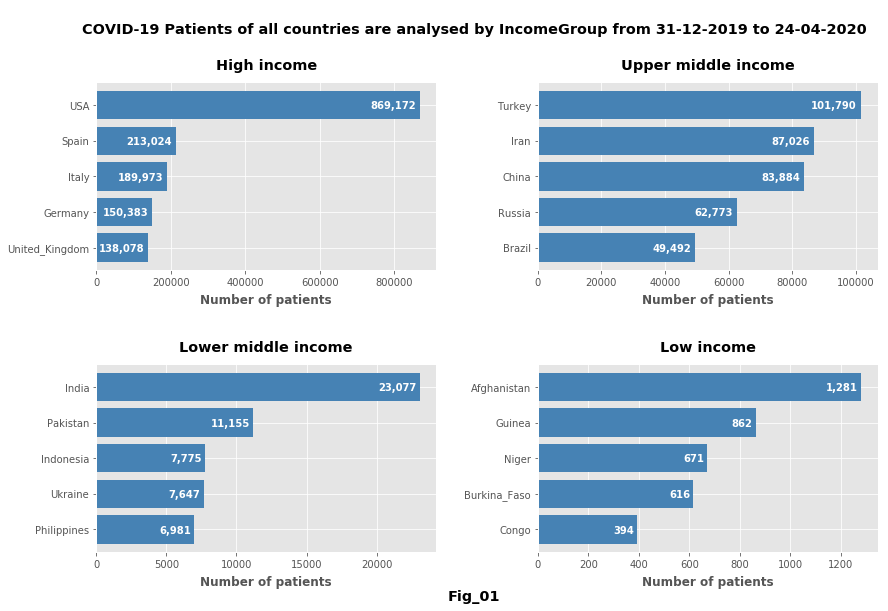

In [9]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(14, 9))
income_grp = country_df.groupby('IncomeGroup')
for g_name, grp in income_grp:
    temp = grp.sort_values('cases').tail()
    ax = (ax1 if g_name=='High income' else ax2
             if g_name=='Upper middle income' else ax3
             if g_name=='Lower middle income' else ax4)
    ax.set_title(g_name, y=1.035, fontdict={'weight':'bold'})
    ax.barh(temp.Country_Name, temp.cases, color='steelblue')
    ax.set_xlabel('Number of patients', fontdict={'weight':'bold'})
    ax.xaxis.set_label_coords(0.5, -0.123)
    for i, v in enumerate(temp.cases):
        x = (v-132_000 if v > 130_000 else v-15_800 if v > 100_000 else v-13_500 if v > 40_000
                       else v-3_000 if v > 11_000 else v-2_500 if v > 6_500 else v-140 if v > 1_200
                       else v-95)
        ax.text(x, i-0.1, f'{v:,}', color='white', weight='bold')

plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.5)
fig.text(.5, 0.925, f'\nCOVID-19 Patients of all countries are analysed by IncomeGroup from \
{start_date} to {last_date}',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, 0.05, 'Fig_01',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

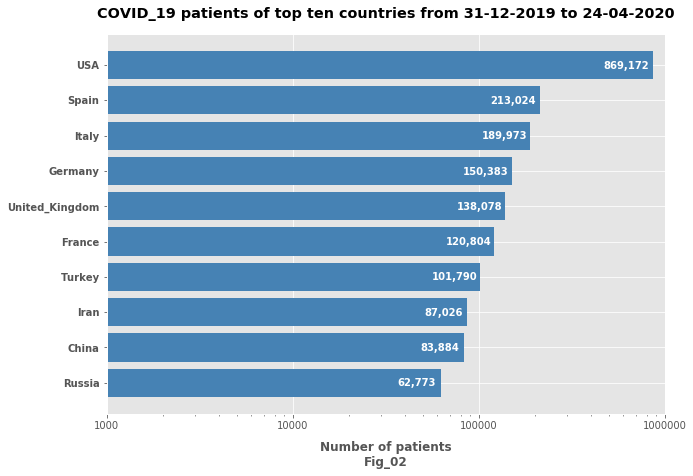

In [10]:
cases_df = country_df.set_index('Country_Name').cases.sort_values().tail(10)
fig, ax= plt.subplots(1, 1, figsize=(10, 7))
ax.barh(cases_df.index, cases_df, color='steelblue')
ax.semilogx()
ax.set_xticks([1_000, 10_000, 100_000, 1000_000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
for i, v in enumerate(cases_df):
    x = (v-400_000 if v > 860_000 else v-97_000 if v > 210_000 else v-86_000 if v > 180_000 else v-68_000
                   if v > 150_000 else v-62_000 if v > 130_000 else v-54_000 if v > 120_000 else v-46_000
                   if v > 100_000 else v-36_000 if v > 87_000 else v-35_500 if v > 83_000 else v-26_000) # 
    ax.text(x, i-0.1, f'{v:,}', color='white', weight='bold')
ax.set_yticklabels(cases_df.index, fontdict={'weight':'bold'})
ax.set_xlabel('Number of patients\nFig_02', fontdict={'weight':'bold'})
ax.set_title(f'COVID_19 patients of top ten countries from {start_date} to {last_date}',
              y=1.025, fontdict={'weight':'bold'})
ax.xaxis.set_label_coords(0.5, -0.07)

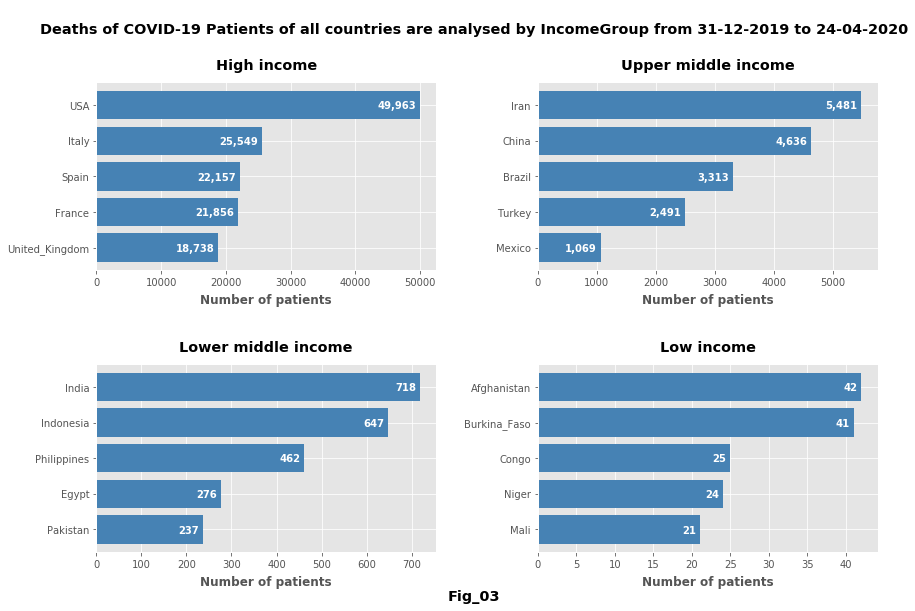

In [11]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(14, 9))
for g_name, grp in income_grp:
    temp = grp.sort_values('deaths').tail()
    ax = (ax1 if g_name=='High income' else ax2
             if g_name=='Upper middle income' else ax3
             if g_name=='Lower middle income' else ax4)
    ax.set_title(g_name, y=1.035, fontdict={'weight':'bold'})
    ax.barh(temp.Country_Name, temp.deaths, color='steelblue')
    ax.set_xlabel('Number of patients', fontdict={'weight':'bold'})
    ax.xaxis.set_label_coords(0.5, -0.123)
    for i, v in enumerate(temp.deaths):
        x = (v-6_500 if v > 18_000 else v-610 if v > 2_000 else v-620
             if v > 1_000 and g_name=='Upper middle income' else v-55
             if v > 200 else v-2.3)
        ax.text(x, i-0.1, f'{v:,}', color='white', weight='bold')

plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.5)
fig.text(.5, 0.925, f'\nDeaths of COVID-19 Patients of all countries are analysed by IncomeGroup from \
{start_date} to {last_date}',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, 0.05, 'Fig_03',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

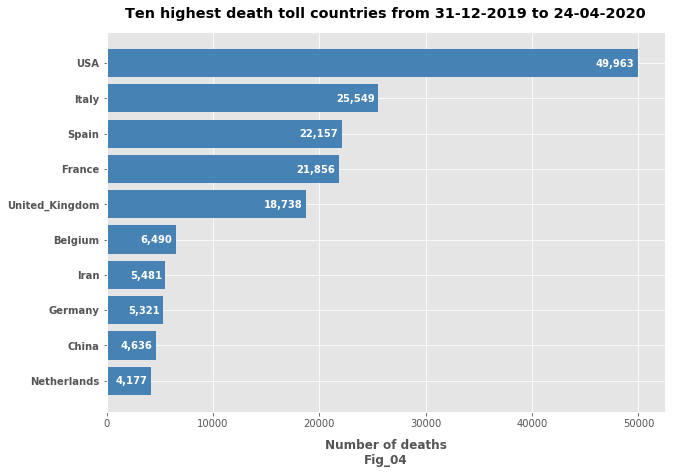

In [12]:
deaths_df = country_df.set_index('Country_Name').deaths.sort_values().tail(10)
fig, ax= plt.subplots(1, 1, figsize=(10, 7))
ax.barh(deaths_df.index, deaths_df, color='steelblue')
for i, v in enumerate(deaths_df):
    x = v-4_000 if v > 18_000 else v-3_300
    ax.text(x, i-0.1, f'{v:,}', color='white', weight='bold')

ax.set_yticklabels(deaths_df.index, fontdict={'weight':'bold'})
ax.set_xlabel('Number of deaths\nFig_04', fontdict={'weight':'bold'})
ax.set_title(f'Ten highest death toll countries from {start_date} to {last_date}',
             y=1.02, fontdict={'weight':'bold'})
ax.xaxis.set_label_coords(0.5, -0.07)

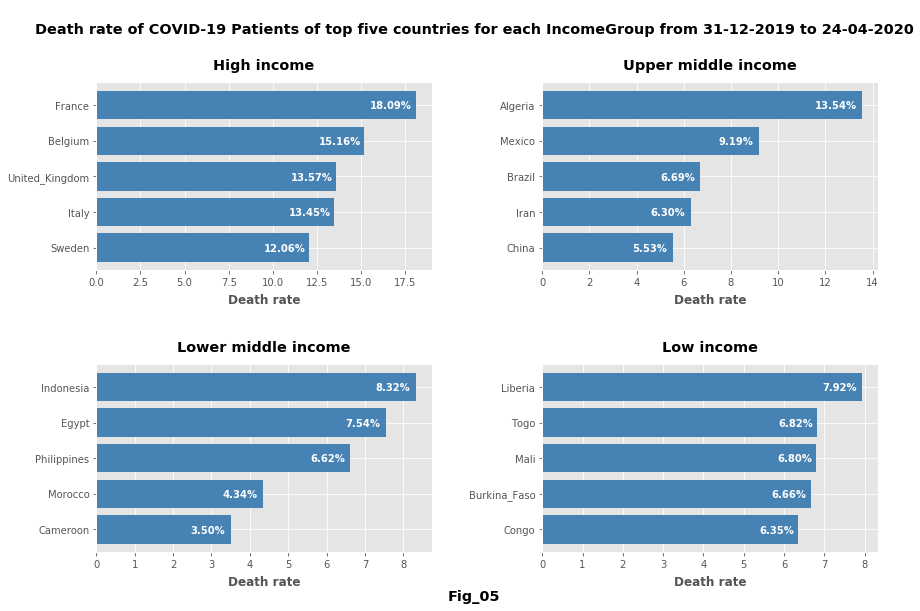

In [13]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(14, 9))
for g_name, grp in income_grp:
    temp = grp.sort_values('deaths', ascending=False).head(10).sort_values('death_rate').tail()
    ax = (ax1 if g_name=='High income' else ax2
             if g_name=='Upper middle income' else ax3
             if g_name=='Lower middle income' else ax4)
    ax.set_title(g_name, y=1.035, fontdict={'weight':'bold'})
    ax.barh(temp.Country_Name, temp.death_rate, color='steelblue')
    ax.set_xlabel('Death rate', fontdict={'weight':'bold'})
    ax.xaxis.set_label_coords(0.5, -0.123)
    for i, v in enumerate(temp.death_rate):
        x = (v-2.57 if g_name == 'High income' else v-2 if g_name == 'Upper middle income' and v > 13
             else v-1.7 if g_name == 'Upper middle income' else v-1.05 if g_name == 'Lower middle income'
             else v-0.97) #else v-1.45 if g_name == 'Low income' and v > 10 
        ax.text(x, i-0.1, f'{v:.2f}%', color='white', weight='bold')

plt.subplots_adjust(top=0.85, wspace=0.33, hspace=0.5)
fig.text(.5, 0.925, f'\nDeath rate of COVID-19 Patients of top five countries for each IncomeGroup from \
{start_date} to {last_date}',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, 0.05, 'Fig_05',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

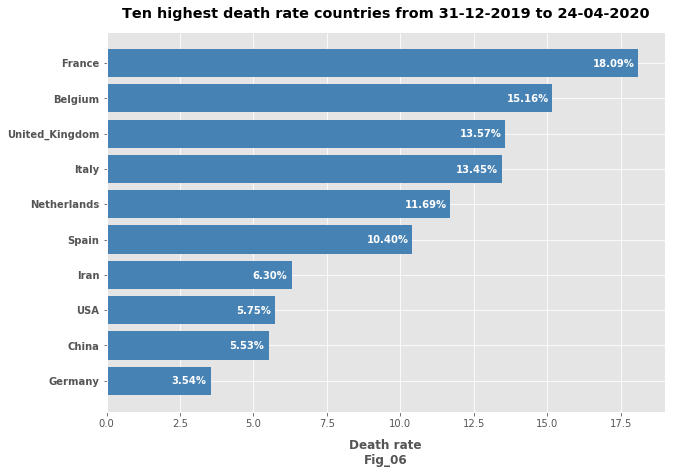

In [14]:
death_rate_df = country_df.sort_values('deaths').tail(10)
death_rate_ten = death_rate_df.set_index('Country_Name').death_rate.sort_values().tail(10)
fig, ax= plt.subplots(1, 1, figsize=(10, 7))
ax.barh(death_rate_ten.index, death_rate_ten, color='steelblue')
for i, v in enumerate(death_rate_ten):
    x = v-1.55 if v > 10 else v-1.35
    ax.text(x, i-0.1, f'{v:.2f}%', color='white', weight='bold')

ax.set_yticklabels(death_rate_ten.index, fontdict={'weight':'bold'})
ax.set_xlabel('Death rate\nFig_06', fontdict={'weight':'bold'})
ax.set_title(f'Ten highest death rate countries from {start_date} to {last_date}',
             y=1.02, fontdict={'weight':'bold'})
ax.xaxis.set_label_coords(0.5, -0.07)

In [15]:
color_dict = {'cases': 'orange', 'deaths': 'red', 'death_rate': 'steelblue'}
cumsum_df = covid_df.groupby('dateRep')[['cases', 'deaths']].sum().cumsum()
cumsum_df.query('deaths > 0', inplace=True)
cumsum_df['death_rate'] = cumsum_df.deaths / cumsum_df.cases * 100

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/fig_07.png'/>

In [16]:
pd.concat([cumsum_df.head(1), cumsum_df.tail(1)])

cases  deaths  death_rate
dateRep                                
2020-01-11       59       1    1.694915
2020-04-24  2667439  190229    7.131522

In [17]:
period_df = covid_df.groupby('dateRep').agg({'cases': 'sum', 'deaths': 'sum'})
period_df.info()
print(period_df.loc[period_df.cases.idxmax()])
print(period_df.loc[period_df.deaths.idxmax()])
period_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2019-12-31 to 2020-04-24
Data columns (total 2 columns):
cases     116 non-null int64
deaths    116 non-null int64
dtypes: int64(2)
memory usage: 2.7 KB
cases     89342
deaths     7049
Name: 2020-04-11 00:00:00, dtype: int64
cases     81012
deaths    10345
Name: 2020-04-16 00:00:00, dtype: int64


cases  deaths
dateRep                  
2019-12-31     27       0
2020-01-01      0       0
2020-01-02      0       0
2020-01-03     17       0
2020-01-04      0       0

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/fig_08.png'/>

<br>

1. low income              **\$1,025** or **less**
2. lower middle income     **\$1,026** and **\$3,995**
3. Upper middle income     **\$3,996** and **\$12,375**
4. High income             **\$12,376** or **more**

**[Classifying countries by income(World Bank)](https://datatopics.worldbank.org/world-development-indicators/stories/the-classification-of-countries-by-income.html)**

**COVID-19** ရောဂါကူးစက်ခံရသူ၊ သေဆုံးသူများ၏အရေအတွက်နှင့်ပတ်သက်သော သတင်းအချက်အလက်ကို **European Centre for Disease Prevention and Control [(ECDC)](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)** မှရယူခဲ့ပါသည်။

**31-12-2019 မှ 24-04-2020** အထိတစ်ကမ္ဘာလုံး၌ **COVID-19** ရောဂါကူးစက်ခံရသူအရေအတွက်မှာ **2,667,439** ယောက်ဖြစ်ပြီး သေဆုံးသူအရေအတွက်မှာ **190,229** ယောက်ဖြစ်ပါသည်။ ပျမ်းမျှသေဆုံးနှုန်းမှာ **7.132%** ဖြစ်ပါသည်။

ဝင်ငွေအုပ်စုအလိုက် **COVID-19** ရောဂါကူးစက်ခံရမှု့ကိုလေ့လာကြည့်ရာ၌ **မြင့်ဆုံးဝင်ငွေအုပ်စု**တွင် အရေအတွက် **869,172** ယောက်ဖြင့် **အမေရိကန်နိင်ငံ**မှလည်းကောင်း  ၊ **အလယ်အလတ်အမြင့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **101,790** ယောက်ဖြင့် **တူရကီနိင်ငံ**မှလည်းကောင်း ၊ **အလယ်အလတ်အနိမ့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **23,077** ယောက်ဖြင့် **အိန္ဒီယနိင်ငံ**မှလည်းကောင်း၊ **အနိမ့်ဆုံးဝင်ငွေအုပ်စု**တွင် အရေအတွက် **1,281** ယောက်ဖြင့် **အာဖကန်နစ္စတန်နိင်ငံ**တို့သည်ရောဂါကူးစက်ခံရမှု့အမြင့်ဆုံးတိုင်းပြည်များဖြစ်ပါသည်**(Fig_01)**။ 
တစ်ကမ္ဘာလုံးအနေဖြင့်လေ့လာကြည့်လျှင် ရောဂါကူးစက်ခံရသူအရေအတွက်အများဆုံးတိုင်းပြည်မှာ **အမေရိကန်နိင်ငံ**ဖြစ်ပြီး အရေအတွက်အားဖြင့် **869,172 (32.58%)** ယောက်ဖြစ်ပါသည်။ ဒုတိယနှင့်တတိယရောဂါကူးစက်ခံရသူအရေအတွက်အများဆုံးတိုင်းပြည်များမှာ **စပိန်နှင့်အီတလီနိင်ငံ**ဖြစ်ပြီး အရေအတွက်အားဖြင့် **213,024 (7.99%) နှင့် 189,973 (7.12%)** ယောက်တို့ဖြစ်ပါသည်**(Fig_02)**။


**COVID-19** ရောဂါကြောင့်သေဆုံးမှု့အား ဝင်ငွေအုပ်စုအလိုက်လေ့လာကြည့်ရာ၌ **မြင့်ဆုံးဝင်ငွေအုပ်စု**တွင် အရေအတွက် **49,963** ယောက်ဖြင့် **အမေရိကန်နိင်ငံ**မှလည်းကောင်း  ၊ **အလယ်အလတ်အမြင့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **5,481** ယောက်ဖြင့် **အီရန်နိင်ငံ**မှလည်းကောင်း ၊ **အလယ်အလတ်အနိမ့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **718** ယောက်ဖြင့် **အိန္ဒီယနိင်ငံ**မှလည်းကောင်း၊ **အနိမ့်ဆုံးဝင်ငွေအုပ်စု**တွင် အရေအတွက် **42** ယောက်ဖြင့် **အာဖကန်နစ္စတန်နိင်ငံ**တို့သည်သေဆုံးမှု့အမြင့်ဆုံးတိုင်းပြည်များဖြစ်ပါသည်**(Fig_03)**။
**COVID-19** ရောဂါကြောင့်သေဆုံးသူအရေအတွက်အား တစ်ကမ္ဘာလုံးအနေဖြင့်လေ့လာကြည့်တွင် သေဆုံးမှု့အများဆုံးတိုင်းပြည်မှာ**အမေရိကန်နိင်ငံ**ဖြစ်ပြီး အရေအတွက်အားဖြင့် **49,963 (26.26%)** ယောက်ဖြစ်ပါသည်။ ဒုတိယနှင့်တတိယသေဆုံးသူအရေအတွက်အများဆုံးတိုင်းပြည်များမှာ **အီတလီနိင်ငံနှင်စပိန်နိင်ငံ**တို့ဖြစ်ပြီး အရေအတွက်အားဖြင့် **25,549 (13.43%) နှင့် 22,157 (11.65%)** ယောက်တို့ဖြစ်ကြပါသည်**(Fig_04)**။


ဝင်ငွေအုပ်စုအလိုက် **COVID-19** ရောဂါကြောင့်သေဆုံးသူအရေအတွက်အများဆုံးတိုင်းပြည် **10**ခုအားရွှေးထုတ်ပြီးနောက် နိင်ငံအလိုက်သေဆုံးနှုန်းအားလေ့လာကြည့်ရာ၌ **မြင့်ဆုံးဝင်ငွေအုပ်စု**တွင် **18.09%** ဖြင့် **ပြင်သစ်နိင်ငံ**မှလည်းကောင်း  ၊ **အလယ်အလတ်အမြင့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **13.54%** ဖြင့် **အယ်လဂျီရီးယားနိင်ငံ**မှလည်းကောင်း ၊ **အလယ်အလတ်အနိမ့်ဝင်ငွေအုပ်စု**တွင် အရေအတွက် **8.32%** ဖြင့် **အင်ဒိုနီးရှားနိင်ငံ**မှလည်းကောင်း၊ **အနိမ့်ဆုံးဝင်ငွေအုပ်စု**တွင် အရေအတွက် **7.92** ဖြင့် **လိုက်ဘေးရီးယားနိင်ငံ**တို့သည်သေဆုံးနှုန်းအမြင့်ဆုံးတိုင်းပြည်များဖြစ်ပါသည်**(Fig_05)**။
**COVID-19** ရောဂါကြောင့်သေဆုံးသူအရေအတွက်အများဆုံးတိုင်းပြည် **10**ခုအားရွှေးထုတ်ပြီးနောက် ထိုတိုင်းပြည်တစ်ခုချင်းအလိုက်သေဆုံးနှုန်းအားတွက်ထုတ်ကြည့်ရာတွင် **ပြင်သစ်နိင်ငံ**သည် သေဆုံးနှုန်းအမြင့်ဆုံးတိုင်းပြည်ဖြစ်ပြီး **18.09%** ဖြစ်ပါသည်။ ထို့နောက် **15.16%** ဖြင့်**ဘယ်လဂျီယမ်နိင်ငံ**သည်လည်းကောင်း၊ **13.57%** ဖြင့်**ယူနိက်တစ်ကင်းဒမ်နိင်ငံ**တို့သည် ဒုတိယနှင့်တတိယ သေဆုံးနှုန်းအမြင့်ဆုံးတိုင်းပြည်များဖြစ်ကြောင်းလေ့လာတွေ့ရှိရသည်။
**COVID-19** ရောဂါကြောင့်သေဆုံးသူအရေအတွက်အများဆုံးတိုင်းပြည်ဖြစ်သော **အမေရိကန်နိင်ငံ**၏သေဆုံးနှုန်းမှာ **5.75%** ဖြစ်ပါသည်**(Fig_06)**။

တစ်ကမ္ဘာလုံး၌ **COVID-19** ရောဂါကြောင့်ပျမ်းမျှသေဆုံးနှုန်းမှာ **11-01-2020**တွင် **1.69%**ဖြစ်ပြီး **14-02-2020** မှစတင်၍ ယနေ့ထိတိုင်သေဆုံးနှုန်းမှာ မြင့်တက်လျက်ရှိ ကြောင်းလေ့လာတွေ့ရှိ ရပါသည်**(Fig_07)**။


တစ်ကမ္ဘာလုံး၌ **COVID-19** ရောဂါကူးဆက်ခံရသူနှင့်သေဆုံးသူအရေအတွက်အား နေ့အလိုက်လေ့လာကြည့်ရာတွင် **11-04-2020** သည်ရောဂါကူးဆက်ခံမှု့အများဆုံးနေ့ဖြစ်ပြီး အရေအတွက်အားဖြင့် **89,342** ယောက်ဖြစ်ပါသည်။ **16-04-2020** သည်သေဆုံးသူအရေအတွက်အများဆုံးနေ့ဖြစ်ခဲ့ပြီး **10,345** ယောက်သေဆုံးကြောင်းလေ့လာတွေ့ရှိရပါသည်**(Fig_08)**။


<br>

In [18]:

body = client_ebd903fa1f234f68a46ff7178f8c1e7e.get_object(Bucket='mkzproject-donotdelete-pr-piwghsabuxrpkz',
                                                          Key='covid_19.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

myan_df = pd.read_excel(body, index_col='Case_no')
myan_df.Adult.replace({0:'Minor', 1:'Majority'}, inplace=True)
myan_df.Hospital.replace({'South Okkalapa Women & Children Hospital':
                          'South Okkalapa Specialist Hospital'}, inplace=True)
m_start_date = myan_df.Confirm_date.min().strftime('%d-%m-%Y')
m_last_date = myan_df.Confirm_date.max().strftime('%d-%m-%Y')
number_of_patients = myan_df.Age.count()
number_of_periods = (myan_df.Confirm_date.max() - myan_df.Confirm_date.min()).days
average_rate = number_of_patients / number_of_periods
print(f'start_date: {m_start_date}', f'last_date : {m_last_date}', sep='\n')
print(f'Total number of patients: {number_of_patients}')
print(f'Total number of periods: {number_of_periods}')
print(f'Average confirm cases per day: {average_rate:.2f}')
print(f'Minimum_age: {myan_df.Age.min()}', f'Maximum_age : {myan_df.Age.max()}', sep='\n')
myan_df.head()

start_date: 23-03-2020
last_date : 24-04-2020
Total number of patients: 144
Total number of periods: 32
Average confirm cases per day: 4.50
Minimum_age: 1.5
Maximum_age : 87.0


Age Gender     Adult Travel_within_14_days               Country  \
Case_no                                                                      
1        36.0   Male  Majority                   Yes                   USA   
2        26.0   Male  Majority                   Yes               England   
3        26.0   Male  Majority                   Yes               England   
4        33.0   Male  Majority                   Yes                   USA   
5        69.0   Male  Majority                   Yes  Australia, Singapore   

                       Hospital Admission_date Confirm_date Condition  \
Case_no                                                                 
1        Tedim General Hospital     2020-03-21   2020-03-23  recovery   
2           Wai Bar Gi Hospital     2020-03-23   2020-03-23    Normal   
3           Wai Bar Gi Hospital     2020-03-23   2020-03-25  recovery   
4          Kandaw Nadi Hospital     2020-03-25   2020-03-27  recovery   
5           Wai Bar Gi Hospital     2020-03-25   2020-03-27     Death   

                             Address     State        Coordinate      Lat  \
Case_no                                                                     
1                         Tedim Town      Chin  23.3689, 93.6508  23.3689   
2                     Hlegu Township    Yangon  16.9205, 96.1565  16.9205   
3                    Insein Township    Yangon  16.9205, 96.1565  16.9205   
4              Chanmyathazi Township  Mandalay  21.9454, 96.1123  21.9454   
5        Mingala Taungnyunt Township    Yangon  16.9205, 96.1565  16.9205   

            Long Infection_type Case_relative Case_relative_no Is_citizen  \
Case_no                                                                     
1        93.6508        Foreign            No                -        Yes   
2        96.1565        Foreign            No                -        Yes   
3        96.1565        Foreign            No                -        Yes   
4        96.1123        Foreign            No                -        Yes   
5        96.1565        Foreign            No                -        Yes   

               Remark  
Case_no                
1            National  
2            National  
3            National  
4        Dual citizen  
5            National

In [19]:
n = 5
count, bin_edges = np.histogram(myan_df.Age, bins=n)
portion = count/count.sum() * 100
print(myan_df.Age.sort_values().values, count, bin_edges, portion, sep='\n')
gender_df = myan_df.Gender.value_counts().reset_index()
gender_df.columns = 'Gender', 'Total'
gender_df['Proportion'] = gender_df.Total / number_of_patients * 100
gender_df

[ 1.5  7.   8.  10.  10.  17.  18.  18.  18.  19.  20.  20.  21.  21.
 21.  23.  23.  24.  24.  24.  24.  24.  24.  24.  25.  26.  26.  26.
 26.  26.  27.  27.  28.  28.  28.  28.  28.  29.  29.  29.  29.  30.
 31.  31.  31.  31.  31.  31.  31.  31.  32.  32.  32.  33.  33.  33.
 33.  34.  35.  35.  35.  35.  35.  35.  36.  36.  37.  37.  38.  38.
 38.  38.  38.  39.  39.  39.  39.  40.  40.  40.  41.  41.  42.  43.
 43.  43.  43.  44.  44.  44.  44.  44.  45.  45.  45.  45.  46.  47.
 47.  47.  49.  49.  50.  50.  51.  52.  53.  54.  54.  54.  54.  55.
 56.  57.  57.  58.  58.  58.  60.  60.  60.  61.  62.  63.  63.  63.
 63.  63.  65.  65.  65.  65.  66.  67.  68.  69.  75.  77.  78.  78.
 80.  85.  85.  87. ]
[ 9 55 42 30  8]
[ 1.5 18.6 35.7 52.8 69.9 87. ]
[ 6.25       38.19444444 29.16666667 20.83333333  5.55555556]


Gender  Total  Proportion
0    Male     78   54.166667
1  Female     66   45.833333

In [20]:
adult_df = myan_df.Adult.value_counts().reset_index()
adult_df.columns = 'Adult', 'Total'
adult_df['Proportion'] = adult_df.Total / number_of_patients * 100
adult_df

Adult  Total  Proportion
0  Majority    138   95.833333
1     Minor      6    4.166667

In [21]:
condition_df = myan_df.Condition.value_counts().reset_index()
condition_df.columns = 'Condition', 'Total'
condition_df['Proportion'] = condition_df.Total / number_of_patients * 100
condition_df

Condition  Total  Proportion
0    Normal    130   90.277778
1  recovery      9    6.250000
2     Death      5    3.472222

In [22]:
infection_df = myan_df.Infection_type.value_counts().reset_index()
infection_df.columns = 'Infection_type', 'Total'
infection_df['Proportion'] = infection_df.Total / number_of_patients * 100
infection_df

Infection_type  Total  Proportion
0          Local    119   82.638889
1        Foreign     25   17.361111

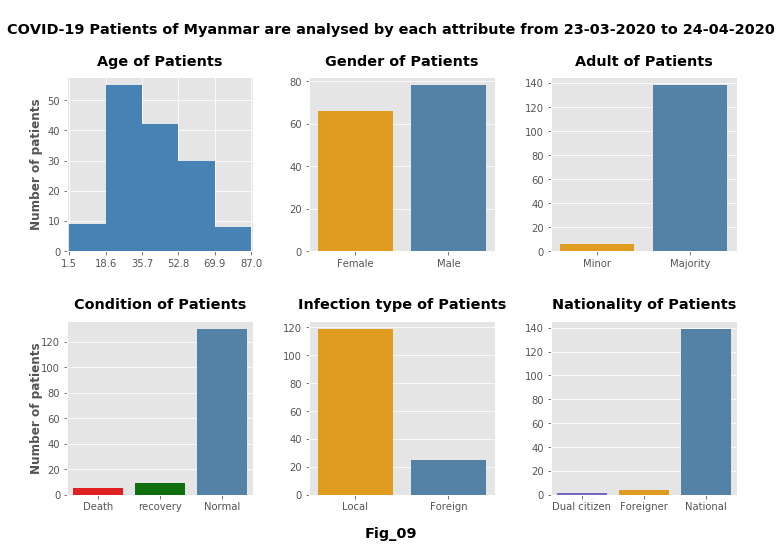

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2, 3, figsize=(12, 8))
myan_df.Age.plot.hist(bins=n, xticks=bin_edges, color='steelblue', ax=ax1)
ax1.set_ylabel('Number of patients', fontdict={'weight':'bold'})
ax1.set_xlim(myan_df.Age.min()-1, myan_df.Age.max()+1)
ax1.yaxis.set_label_coords(-0.13, 0.5)
ax1.set_title('Age of Patients', y=1.035, fontdict={'weight':'bold'})

sns.categorical.countplot('Gender', data=myan_df, palette=['orange', 'steelblue'],
                           ax=ax2, order=['Female', 'Male'])
ax2.set(xlabel=None, ylabel=None)
ax2.set_title('Gender of Patients', y=1.035, fontdict={'weight':'bold'})

sns.categorical.countplot('Adult', data=myan_df, palette=['orange', 'steelblue'],
                           ax=ax3, order=['Minor', 'Majority'])
ax3.set(xlabel=None, ylabel=None)
ax3.set_title('Adult of Patients', y=1.035, fontdict={'weight':'bold'})

sns.categorical.countplot('Condition', data=myan_df, palette=['red', 'green', 'steelblue'],
                           ax=ax4, order=['Death', 'recovery', 'Normal'])
ax4.set(xlabel=None)
ax4.set_ylabel('Number of patients', fontdict={'weight':'bold'})
ax4.yaxis.set_label_coords(-0.13, 0.5)
ax4.set_title('Condition of Patients', y=1.035, fontdict={'weight':'bold'})

sns.categorical.countplot('Infection_type', data=myan_df, palette=['orange', 'steelblue'],
                           ax=ax5, order=['Local', 'Foreign'])
ax5.set(xlabel=None, ylabel=None)
ax5.set_title('Infection type of Patients', y=1.035, fontdict={'weight':'bold'})

sns.categorical.countplot('Remark', data=myan_df, palette=['slateblue', 'orange', 'steelblue'],
                           ax=ax6, order=['Dual citizen', 'Foreigner', 'National'])
ax6.set(xlabel=None, ylabel=None)
ax6.set_title('Nationality of Patients', y=1.035, fontdict={'weight':'bold'})

plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)
fig.text(.5, 0.925, f'\nCOVID-19 Patients of Myanmar are analysed by each attribute from \
{m_start_date} to {last_date}',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, 0.05, 'Fig_09',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

In [24]:
tsp_df = myan_df.query('State=="Yangon"').Address.value_counts(ascending=True)
tsp_df.index = tsp_df.index.str.replace(' Township', '')

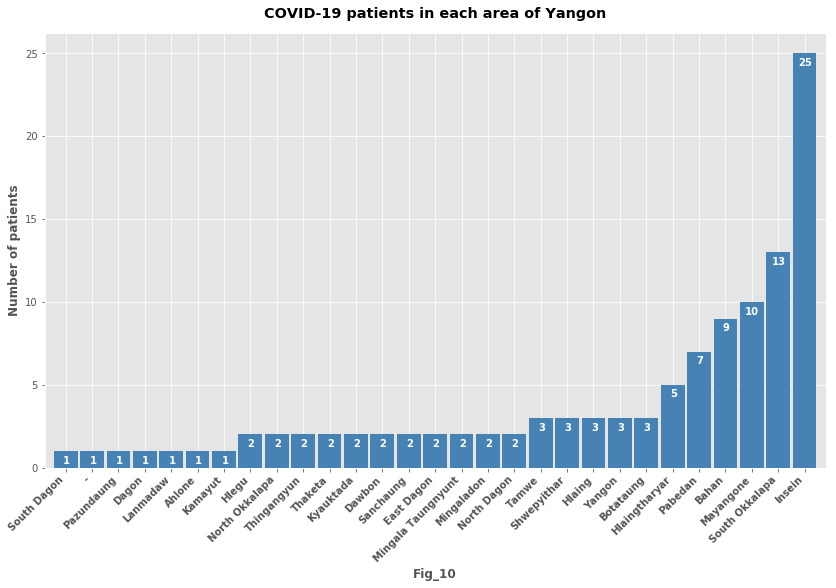

In [25]:
fig, ax= plt.subplots(1, 1, figsize=(14, 8))
ax.bar(tsp_df.index, tsp_df, color='steelblue', width=0.9) 
for i, v in enumerate(tsp_df):
    x = i-0.1 if v < 10 else i-0.25
    ax.text(x, v-0.75, f'{v}', color='white', weight='bold')
ax.set_xlim(-.8, len(tsp_df)-0.2)
ax.set_ylabel('Number of patients', fontdict={'weight':'bold'})
ax.set_xlabel('Fig_10', fontdict={'weight':'bold'})
ax.set_title('COVID-19 patients in each area of Yangon', y=1.02, fontdict={'weight':'bold'})
ax.set_xticklabels(tsp_df.index, rotation = 45, ha='right', fontdict={'weight':'bold'});

In [26]:
state_df = myan_df.State.value_counts().reset_index()
state_df.columns = 'State', 'Total'
state_min = state_df.Total.min()
state_max = state_df.Total.max()
state_df['Proportion'] = state_df.Total / number_of_patients * 100
state_df['norm'] = np.log(state_df.Total)
state_df

State  Total  Proportion      norm
0         Yangon    113   78.472222  4.727388
1    Bago (West)      6    4.166667  1.791759
2        Sagaing      6    4.166667  1.791759
3           Chin      5    3.472222  1.609438
4    Shan (East)      3    2.083333  1.098612
5       Mandalay      3    2.083333  1.098612
6   Shan (North)      2    1.388889  0.693147
7   Shan (South)      2    1.388889  0.693147
8            Mon      1    0.694444  0.000000
9         Magway      1    0.694444  0.000000
10   Nay Pyi Taw      1    0.694444  0.000000
11        Kachin      1    0.694444  0.000000

In [27]:
myan_map = folium.Map(location=[19.9940,96.0864],
                      tiles='StamenToner',
                      zoom_start=5)
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/myanmar(original).json',
    data=state_df,
    columns=['State', 'norm'],
    bins=4,
    key_on='feature.properties.ST',
    nan_fill_color='white',
    line_color='black',
    fill_color='Paired', 
    fill_opacity=1, 
    line_opacity=0.5,
    #legend_label=[1, 3.1, 6.1, 50.1, 99],
    legend_name ='COVID-19',
    name="COVID-19 patients of each state",
    overlay=True,
    highlight = True).add_to(myan_map)
folium.LayerControl().add_to(myan_map)
myan_map.save('Myanmar_covid-19_map.html')
myan_map

In [28]:
myan2_map = folium.Map([19.9940,96.0864],zoom_start=5)
cluster = plugins.MarkerCluster().add_to(myan2_map)
host_lst = ['Naypyitaw General Hospital', 'Kengtung General Hospital', 'Magway Regional Hospital',
            'Yangon General Hospital']
host_lst2 = ['Mawlamyine General Hospital', 'Myitkyina General Hospital']
for t in myan_df.reset_index().itertuples():
    html=f'''<div style="font-size:9pt; background-color:steelblue; color:white;">
                <div style="padding:3.5px 0; line-height:1.4;">
                    <b style="padding:0 7px;">Case_no
                        <span  style="padding: 0 1px 0 30.75px;">:</span>
                    </b>{t.Case_no:02d}<br>
                    <b style="padding:0 7px;">Age
                        <span  style="padding: 0 1px 0 54.35px;">:</span>
                    </b>{t.Age}<br>
                    <b style="padding:0 7px;">Gender
                        <span  style="padding: 0 1px 0 36px;">:</span>
                    </b>{t.Gender}<br>
                    <b style="padding:0 7px;">Condition
                        <span  style="padding: 0 1px 0 23.5px;">:</span>
                    </b>{t.Condition}<br>
                    <b style="padding:0 7px;">Infection_type
                        <span  style="padding: 0 1px;">:</span>
                    </b>{t.Infection_type}<br>
                    <b style="padding:0 7px;">Nationality
                        <span  style="padding: 0 1px 0 18px;">:</span>
                    </b>{t.Remark}<br>
                    <b style="padding:0 7px;">Hospital
                        <span  style="padding: 0 1px 0 32px;">:</span>
                    </b>{t.Hospital}<br>
                </div>
             </div>
          '''
    width = (304 if t.Hospital == 'South Okkalapa Specialist Hospital' else 282
                 if t.Hospital in host_lst2 else 271 if t.Hospital in host_lst else 251)
    ifram=folium.IFrame(html, width=width, height=135)
    popup=folium.Popup(ifram)
    icon=folium.Icon(color='green' if t.Condition == 'recovery' else 'cadetblue' 
                                   if t.Condition != 'Death' else 'red')
    folium.Marker([t.Lat, t.Long], popup=popup, icon=icon).add_to(cluster)
myan2_map

<br>

**23-03-2020 မှ 24-04-2020** အထိမြန်မာနိင်ငံ၌ **COVID-19** ရောဂါကူးစက်ခံရသောလူအရေအတွက်မှာ **144** ယောက်ဖြစ်ပြီး၊ **5** ဦးသေဆုံး၍ ရောဂါကင်းစင်သွားသူ **9** ဦးရှိပါသည်။ မြန်မာနိင်ငံ၌ **COVID-19** ရောဂါကူးစက်ခံရသူများတွင် အသက် **1 နှစ် 6 လ**သည်အသက်အငယ်ဆုံးဖြစ်ပြီး အသက်အကြီးဆုံးမှာ **87**နှစ်ဖြစ်ကြောင်းတွေ့ရှိရသည်။တစ်နေ့လျှင်ပျမ်းမျှ **4.5** ယောက်ရောဂါကူးစက်ခံနေ ရပါသည်။

ရောဂါကူးစက်ခံရသူအရေအတွက်အများဆုံးအသက်အပိုင်းအခြားမှာ **18.6 မှ 35.7** နှစ်အကြားဖြစ်ပြီး **55(38.19%)** ယောက်ဖြစ်ပါသည်။ ဒုတိယအများဆုံးမှာ **35.7 မှ 52.8** နှစ်အကြားဖြစ်ပြီး **42(29.17%)** ယောက်ဖြစ်ပါသည်။ ရောဂါကူးစက်ခံရမှု့၏ **54.17%** မှာအမျိုးသားများဖြစ်ပြီး အမျိုးသမီးများ၏ရောဂါကူးစက်ခံရနှုန်းမှာ **45.83%** ဖြစ်ပါသည်။

အသက် **18** နှစ်မှအထက်ရောဂါကူးစက်ခံရသောနှုန်းမှာ **95.83%** ဖြစ်ပြီး အသက် **18** နှစ်အောက်ရောဂါကူးစက်ခံရသောနှုန်းမှာ **4.17%** ဖြစ်ပါသည်။ မြန်မာနိင်ငံ၌ **COVID-19** ရောဂါကြောင့်သေဆုံးနှုန်းမှာ **3.47%** ဖြစ်ပြီး ရောဂါပျောက်ကင်းမှု့နှုန်းမှာ **6.25%** ကြောင်းတွေ့ရှိရသည်။ ရောဂါကူးစက်ခံရသူများ၏ **17.36%** သည် ပြည်ပမှကူးစက်ခံရသူများဖြစ်ပြီး ပြည်တွင်းကူးစက်ခံရသောနှုန်းမှာ **82.64%** ဖြစ်ကြောင်းလေ့လာတွေ့ရှိရပါသည်။


မြန်မာနိင်ငံ၌ရောဂါကူးစက်ခံရသူအများဆုံးရှိသောဒေသမှာ ရန်ကုန်တိုင်းဒေသကြီးဖြစ်ပြီး **113(78.47%)** ယောက်ဖြစ်ပါသည်။ ရန်ကုန်တိုင်းဒေသကြီးတွင် အင်းစိန်မြို့နယ်သည် ရောဂါဖြစ်ပွါးမှု့အများဆုံး ဖြစ်ပြီး အရေအတွက်အားဖြင့် **25** ယောက်ဖြစ်ပါသည်။

<br>

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/case3.gv.png' style="width:50%">

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/case4.gv.png'>

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/case5.gv.png'/>

<br>

<img src='https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/COVID-19%20cases%20vs%20deaths.gif' alt='Animated Bubble plot for COVID-19'/>

<br>

#### မှတ်ချက်

1. **MOHS** မှထုတ်ပြန်ချက်တွင် မည်သူ့ထံမှတဆင့်ရောဂါကူးစက်ခံရသည်ကို အမှတ်စဥ်ဖြင့်သော်လည်းကောင်း၊ အမှတ်စဥ်မပါ၍သော်လည်းကောင်းဖော်ပြလေ့ရှိပါသည်။ ထို့ကြောင့် တဆင့်ရောဂါကူးစက်ခံရမှု့ကိုဖော်ပြသောပုံသည် ရရှိသောသတင်းအချက်အလက်အပေါ်အခြေခံ၍ရေးဆွဲထားခြင်းသောကြောင့် ပြည့်စုံသည်ဟုမဆိုနိင်ပါ။

2. **25-04-2020 04:20:00 AM** အထိတစ်ကမ္ဘာလုံး၌ ရောဂါကူးစက်ခံရသူအရေအတွက်မှာ **2,789,315** ယောက်ဖြစ်ပြီး သေဆုံးသူအရေအတွက်မှာ **195,775** ယောက်ဖြစ်ပါသည်။